<h1>Содержание<span class="tocSkip"></span></h1>
<li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
data=pd.read_csv('real_estate_data.csv', sep='\t')
data.head() 


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим список населенных пунктов

In [3]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

### Вывод

По данным info видно, что таблица заполнена неравномерно, в каких-то столбцах есть пропущенные значения.Абсолютный бедлам с названиями населенных пунктов. Нет столбца с рег.номером(id), что осложнит анализ.Будем по-порядку рассматривать каждый столбец, оценивая его важность как параметра  для формирования рыночной стоимости.

## Предобработка данных

Для главной цели этого анализа населенный пункт - один из основных параметров. Сначала нужно структурировать список  населенных пунктов. По данным info() это как раз тот столбец, где имеются пропущенные значения. При запросе isnull() вышли все 23699 - 23650 = 49 строк, где не указан населенный пункт. Так как невозможно определять рыночную стоимость неизвестно где, эти строки придется удалить.

In [4]:
data = data.query('not locality_name.isnull()')
data.info()                  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          14490 non-null float64
floors_total            23565 non-null float64
living_area             21752 non-null float64
floor                   23650 non-null int64
is_apartment            2760 non-null object
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            21381 non-null float64
balcony                 12137 non-null float64
locality_name           23650 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Отберем типы населенных пунктов из 'locality_name'

In [5]:
types_of_locality = []
def get_type_of_locality(str_locality):
    type_loc =''
    for word in str_locality.split():
        if not word.istitle(): 
            type_loc=type_loc+' '+ word
        else: return type_loc.lstrip()   
    
for locality in data['locality_name']:
    t_loc = get_type_of_locality(str(locality))
 
    if (t_loc != None) and ( t_loc not in types_of_locality) and(t_loc != '')  :
        types_of_locality.append(t_loc)   
types_of_locality.sort(key=len,reverse = True)

types_of_locality

['садоводческое некоммерческое товарищество',
 'посёлок при железнодорожной станции',
 'поселок городского типа имени',
 'посёлок городского типа имени',
 'поселок городского типа',
 'посёлок городского типа',
 'садовое товарищество',
 'коттеджный поселок',
 'коттеджный посёлок',
 'городской посёлок',
 'городской поселок',
 'поселок станции',
 'посёлок станции',
 'посёлок',
 'деревня',
 'поселок',
 'село']

Создадим столбец с типами населенных пунктов и отделим тип от названия

In [6]:
data['locality_type'] = 0
data['locality_type']=data['locality_type'].astype(int)
for q in types_of_locality:
    code = 0
    if q in ['городской поселок','городской посёлок','поселок городского типа','посёлок городского типа']:
        code = 1
    if q in ['деревня']:
        code = 2
    if q in ['коттеджный поселок','коттеджный посёлок']:
        code = 3
    if q in ['поселок','посёлок']:    
        code = 4
    if q in ['поселок городского типа имени','посёлок городского типа имени']:    
        code = 5   
    if q in ['поселок станции','посёлок при железнодорожной станции','посёлок станции']:    
        code = 6  
    if q in ['садоводческое некоммерческое товарищество','садовое товарищество']:    
        code = 7  
    if q in ['село']:    
        code = 8  
        
    data.loc[data['locality_name'].str.startswith(q), 'locality_type'] = code 
    data.loc[data['locality_name'].str.startswith(q), 'locality_name'] = data['locality_name'].str.replace(q,'')
    
data.head(3)    

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,4
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0


Сверим записи до и после разделения

In [7]:
list1=data['locality_name'].value_counts()
list1

Санкт-Петербург        15721
 Мурино                  556
 Шушары                  440
Всеволожск               398
Пушкин                   369
                       ...  
 Лаврики                   1
 Раздолье                  1
 Борисова Грива            1
 Большая Пустомержа        1
 Тихковицы                 1
Name: locality_name, Length: 309, dtype: int64

In [8]:
data['locality_name'] = data['locality_name'].str.lstrip()  

In [9]:
list2=data['locality_name'].value_counts()
list2

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Каложицы               1
Большой Сабск          1
Коммунары              1
Алексеевка             1
Плоское                1
Name: locality_name, Length: 305, dtype: int64

Выяснилось, что список "после" на 4 записи короче, это означает, что у части каких-то населенных 
пунктов тип заполнен по-разному, сравним 2 столбца

In [10]:
list2.name = 'locality_name_new' 
list_delta = list1.to_frame().join(list2.to_frame(),how = 'inner').sort_values(by='locality_name',ascending =False)


Путем объединения столбцов в list_delta и дальнейших плясок с бубном вокруг него удалось найти эти
записи,а т.к. их всего 4 заполним  вручную их тип


In [11]:
data.loc[data['locality_name'] == 'Кудрово', 'locality_type'] = 2
data.loc[data['locality_name'] == 'Мурино', 'locality_type'] = 4
data.loc[data['locality_name'] == 'Любань', 'locality_type'] = 4
data.loc[data['locality_name'] == 'Никольское', 'locality_type'] = 8

Хотя в большинстве записей вообще не указан тип и, скорее всего, эта колонка вообще не будет иметь никакого практического значения, но,приличия ради, для нее создадим словарь типов, который может пригодиться для итоговых отчетов.

In [12]:
dict_of_types_localities ={0:['нет',' '],1:['пгт','посёлок городского типа'],2:['дер.','деревня'],
                           3:['ктж пос.','коттеджный посёлок'],4:['пос.','посёлок'],5:['пгт им.','посёлок городского типа имени'],
                           6:['ст.пос.','станционный поселок'],7:['снт','садоводческое некоммерческое товарищество'],
                           8:['с.','село']}


Выберем единичные записи и сохраним их для архива, удаляя из основного файла, но при этом из них оставим записи, где есть сведения о расстоянии от центра. Наша задача вычислить рыночную стоимость, а такие записи по 1 в пункте, без расстояния до центра, никакой информации не дадут. Теоретически, конечно, можно найти это расстояние в Интернете и заполнить пропуски, но сейчас я этим заниматься не буду, тем более, что их меньше процента от общего количества.  

In [13]:
list2_less_2 = list2.to_frame().query('locality_name_new==1') 


In [14]:
data_single_records = data.query('locality_name in @list2_less_2.index  and cityCenters_nearest.isna()')


In [15]:
list2_less_2 =list2_less_2.query('locality_name_new.index not in ["Петро-Славянка","Левашово","Белоостров"]')

data =  data.query('locality_name not in @list2_less_2.index ')
data.info()                   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null object
rooms                   23574 non-null int64
ceiling_height          14459 non-null float64
floors_total            23489 non-null float64
living_area             21689 non-null float64
floor                   23574 non-null int64
is_apartment            2753 non-null object
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            21320 non-null float64
balcony                 12108 non-null float64
locality_name           23574 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     18139 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Итак, в файле осталось 23574 записи, где объявлений >=2 (для расчета среднего). Следующий важный параметр - расстояние от центра, оно не указано в 5435 записях.

In [16]:
data.query('cityCenters_nearest.isna()')['locality_name'].value_counts()

Мурино        588
Кудрово       472
Всеволожск    398
Гатчина       307
Выборг        237
             ... 
Выскатка        2
Кронштадт       1
Ломоносов       1
Пушкин          1
Колпино         1
Name: locality_name, Length: 211, dtype: int64

В топе оказались города, где вообще не заполнено cityCenters_nearest, но т.к. расстояние считаем от центра СПб, то сюда достаточно указать расстояние между городами.

In [17]:
data.loc[data['locality_name'] == 'Кудрово', 'cityCenters_nearest'] = 11000
data.loc[data['locality_name'] == 'Мурино', 'cityCenters_nearest'] = 21888
data.loc[data['locality_name'] == 'Всеволожск', 'cityCenters_nearest'] = 21000
data.loc[data['locality_name'] == 'Гатчина', 'cityCenters_nearest'] = 42000
data.loc[data['locality_name'] == 'Выборг', 'cityCenters_nearest'] = 121000
data.loc[data['locality_name'] == 'Новое Девяткино', 'cityCenters_nearest'] = 16000
data.loc[data['locality_name'] == 'Сертолово', 'cityCenters_nearest'] = 24000
data.loc[data['locality_name'] == 'Кириши', 'cityCenters_nearest'] = 109000
data.loc[data['locality_name'] == 'Бугры', 'cityCenters_nearest'] = 15000
data.loc[data['locality_name'] == 'Сланцы', 'cityCenters_nearest'] = 155000
data.loc[data['locality_name'] == 'Волхов', 'cityCenters_nearest'] = 11200
data.loc[data['locality_name'] == 'Кингисепп', 'cityCenters_nearest'] = 114000
data.loc[data['locality_name'] == 'Тосно', 'cityCenters_nearest'] = 54000
data.loc[data['locality_name'] == 'Никольское', 'cityCenters_nearest'] = 37000
data.loc[data['locality_name'] == 'Коммунар', 'cityCenters_nearest'] = 35000
data.loc[data['locality_name'] == 'Сосновый Бор', 'cityCenters_nearest'] = 68000
data.loc[data['locality_name'] == 'Кировск', 'cityCenters_nearest'] = 38000
data.loc[data['locality_name'] == 'Отрадное', 'cityCenters_nearest'] = 32000
data.loc[data['locality_name'] == 'Янино-1', 'cityCenters_nearest'] = 14000
data.loc[data['locality_name'] == 'Приозерск', 'cityCenters_nearest'] = 123000
data.loc[data['locality_name'] == 'Старая', 'cityCenters_nearest'] = 18000
data.loc[data['locality_name'] == 'Шлиссельбург', 'cityCenters_nearest'] =39000
data.loc[data['locality_name'] == 'Рощино', 'cityCenters_nearest'] = 53000
data.loc[data['locality_name'] == 'Заневка', 'cityCenters_nearest'] = 53000
data.loc[data['locality_name'] == 'Токсово', 'cityCenters_nearest'] = 27000
data.loc[data['locality_name'] == 'Луга', 'cityCenters_nearest'] = 136000
 

In [18]:
data.query('cityCenters_nearest.isna()')['locality_name'].value_counts()



Санкт-Петербург    61
Тихвин             49
Тельмана           41
Романовка          36
Свердлова          36
                   ..
Бор                 2
Пушкин              1
Кронштадт           1
Ломоносов           1
Колпино             1
Name: locality_name, Length: 185, dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23574 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23574 non-null int64
last_price              23574 non-null float64
total_area              23574 non-null float64
first_day_exposition    23574 non-null object
rooms                   23574 non-null int64
ceiling_height          14459 non-null float64
floors_total            23489 non-null float64
living_area             21689 non-null float64
floor                   23574 non-null int64
is_apartment            2753 non-null object
studio                  23574 non-null bool
open_plan               23574 non-null bool
kitchen_area            21320 non-null float64
balcony                 12108 non-null float64
locality_name           23574 non-null object
airports_nearest        18116 non-null float64
cityCenters_nearest     21907 non-null float64
parks_around3000        18140 non-null float64
parks_nearest           8064 non-null float64
ponds_around300

Заполнили расстояния для пунктов с большим количеством объявлений, осталось 7% от общего количества.
Предлагаю убрать их из общей выборки. В том числе 61 запись для СПб, т.к. в объемах СПб это меньше 1%. При выборочном просмотре выяснилось, что в основном эти пункты не заполнены полностью,а единичные записи в конце списка это меньше 1% от количества соответствующего пункта. Эти оставшиеся записи сохраним в отдельном файле, вдруг кого-то заинтересуют предложения в конкретном пункте, уже без привязки к СПб.

In [20]:
data_tails = data.query('cityCenters_nearest.isna()')
data_tails.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.5,5.0,NaN,1,NaN,...,NaN,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,1
68,11,4150000.0,74.0,2017-08-04T00:00:00,3,2.8,5.0,44.0,1,NaN,...,2.0,Фёдоровское,NaN,NaN,NaN,NaN,NaN,NaN,234.0,2
81,9,10949000.0,68.0,2018-12-27T00:00:00,1,NaN,10.0,NaN,6,NaN,...,NaN,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [21]:
data =  data.query(' cityCenters_nearest.notna()')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21907 entries, 0 to 23697
Data columns (total 23 columns):
total_images            21907 non-null int64
last_price              21907 non-null float64
total_area              21907 non-null float64
first_day_exposition    21907 non-null object
rooms                   21907 non-null int64
ceiling_height          13531 non-null float64
floors_total            21825 non-null float64
living_area             20220 non-null float64
floor                   21907 non-null int64
is_apartment            2601 non-null object
studio                  21907 non-null bool
open_plan               21907 non-null bool
kitchen_area            19843 non-null float64
balcony                 11278 non-null float64
locality_name           21907 non-null object
airports_nearest        18115 non-null float64
cityCenters_nearest     21907 non-null float64
parks_around3000        18139 non-null float64
parks_nearest           8063 non-null float64
ponds_around300

После географических преобразований в выборке осталось 21907 записей. Следующий вопрос, который нас интересует в рамках текущей задачи, какие параметры влияют на конечную стоимость квартиры. 

## Расчёты и добавление результатов в таблицу

Если смотреть на предлагаемые представленные данные, то на конечную стоимость однозначно влияют населенный пункт, местоположение в нем(наличие парков в том числе), тип квартиры, общая площадь, этаж, качество квартиры, куда можно отнести высоту потолков и размер кухни.В файле в этих показателях остались пропущенные значения. Рассмотрим эти колонки по-порядку.

Столбец ceiling_height. Пропущенных значений где-то треть. Это означает, что, скорее всего, хозяин не придает этому значения, считая высоту стандартной или не хочет афишировать, считая ее низкой. Заменим пропуски min высотой для "хрущевок" 2.45. Кроме того, при визуальном просмотре  выяснилось, что в данных имеются явные ошибки несколько десятков высота < 2 м и порядка сотни > 5, заменять непонятно как, придется отсекать на графике. 

In [22]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height'] = 2.45


 floors_total. 82 пропущенных значений. Это 0.3%. Заменим на тот же этаж, считая верхним. А вообще, если это не намеренно запорченные значения для учебной задачи, это поле должно быть обязательным для заполнения.


In [23]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data['floor']



is_apartment. Здесь просто, если явно не указано, тогда False.

In [24]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] =False


kitchen_area. Больше 2000 незаполненных значений. Проверим по категориям. В пределах 20-ти записей в апартаментах.Это меньше 1%. Проверили, что пропущенные значения для апартаментов не являются студией или open_plan, значит заполним все min значением - 5 м2, кроме студий и open_plan. Затем посчитаем пропущенные жилая площадь.

In [25]:
data.loc[(data['kitchen_area'].isna()) & (data['open_plan'] | data['studio']), 'kitchen_area'] =0
data.loc[data['kitchen_area'].isna() , 'kitchen_area'] =5
data.loc[data['living_area'].isna() , 'living_area'] = data['total_area'] - data['kitchen_area']


balcony. Если балкон не указан, значит заполняем "0", попутно переведем колонку в тип int

In [26]:
data.loc[data['balcony'].isna(), 'balcony'] =0
data['balcony']=data['balcony'].astype(int)
#data.info()

При просмотре записей выявились записи с некоректными данными, например, несоответствие площадей кухни и жилой и проч. В частности, есть записи, где количество комнат=0. Исправим, 0 => 1.  

In [27]:
data.loc[data['rooms']==0, 'rooms'] =1

days_exposition. Пропущенные значения заменим средним, рассчитав медиану.

In [28]:
data.loc[data['days_exposition'].isna(), 'days_exposition'] =0

d=data['days_exposition'].median()
data.loc[data['days_exposition']==0, 'days_exposition'] =d
data['days_exposition']=data['days_exposition'].astype(int)


Остались колонки с парками, водоемами и аэропортами. Аэропорт в СПб -  один и все знают, где он находится, водоемы для Питера -  не актуально, поэтому эти колонки использовать не будем.Лучше всего их совсем удалить, потому что из-за них пропадают из зоны видимости значимые для нас столбцы.А пустые значения с парками заполним 0 и max значением 10км.

In [29]:
data=data.drop(['airports_nearest','ponds_around3000','ponds_nearest'], axis = 1)
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] =0
data.loc[data['parks_nearest'].isna(), 'parks_nearest'] =10000
data.head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,cityCenters_nearest,parks_around3000,parks_nearest,days_exposition,locality_type
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,16028.0,1.0,482.0,74,0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.45,11.0,18.6,1,False,False,False,11.0,2,Шушары,18603.0,0.0,10000.0,81,4
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.45,5.0,34.3,4,False,False,False,8.3,0,Санкт-Петербург,13933.0,1.0,90.0,558,0


Переведем в тип int колонки с целыми числами дату в тип datetime

In [30]:
data['total_images'] = data['total_images'].astype(int)
data['floors_total'] = data['floors_total'].astype(int) 
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

data.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 21907 entries, 0 to 23697
Data columns (total 20 columns):
total_images            21907 non-null int32
last_price              21907 non-null float64
total_area              21907 non-null float64
first_day_exposition    21907 non-null datetime64[ns]
rooms                   21907 non-null int64
ceiling_height          21907 non-null float64
floors_total            21907 non-null int32
living_area             21907 non-null float64
floor                   21907 non-null int64
is_apartment            21907 non-null bool
studio                  21907 non-null bool
open_plan               21907 non-null bool
kitchen_area            21907 non-null float64
balcony                 21907 non-null int32
locality_name           21907 non-null object
cityCenters_nearest     21907 non-null float64
parks_around3000        21907 non-null int32
parks_nearest           21907 non-null float64
days_exposition         21907 non-null int32
locality_type  

Заполнив пропущенные значения в необходимых нам колонках, проверим строки на дубли 

In [31]:
data.duplicated().sum()

0

Посчитаем стоимость кв.метра для каждого объявления, день недели, месяц и год публикации объявления

In [32]:
data['price_m2'] = data['last_price'] /data['total_area']
data['day_of_week'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year


Поделим этажи на категории

In [33]:
data['level_floor'] = 'other' 
data.loc[data['floor'] == 1, 'level_floor'] ='first'
data.loc[data['floor'] == data['floors_total'] , 'level_floor'] = 'top'


посчитаем отношения: соотношение жилой и общей площади, а также отношение площади кухни к общей

In [34]:
data['living_total'] = data['living_area']/data['total_area']
data['kitchen_total'] = data['kitchen_area']/data['total_area']
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,days_exposition,locality_type,price_m2,day_of_week,month,year,level_floor,living_total,kitchen_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,74,0,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.45,11,18.60,1,False,...,10000.0,81,4,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.45,5,34.30,4,False,...,90.0,558,0,92785.714286,3,8,2015,other,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,2.45,14,154.00,9,False,...,84.0,424,0,408176.100629,4,7,2015,other,0.968553,0.031447
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,121,0,100000.000000,1,6,2018,other,0.320000,0.410000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,10000.0,519,0,129903.978052,3,10,2016,other,0.552812,0.145405
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,352.0,239,0,73717.948718,4,8,2016,other,0.641026,0.128205
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.0,74,0,72490.845228,1,3,2017,other,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.45,5,38.00,4,False,...,10000.0,45,0,52542.372881,0,1,2018,other,0.644068,0.144068


## Исследовательский анализ данных


Вопрос: Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

Общая площадь квартиры:

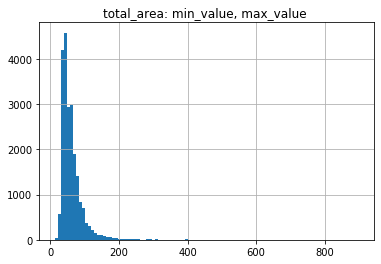

In [35]:
import matplotlib.pyplot as plt
min_value = data['total_area'].min()
max_value = data['total_area'].max()
data['total_area'].hist(bins=100, range=(min_value, max_value)).set_title('total_area: min_value, max_value ')
plt.show() 

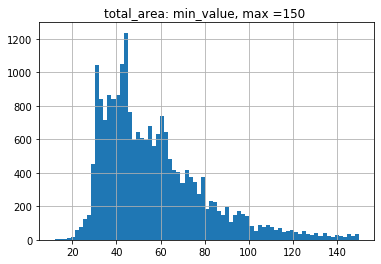

In [36]:
data['total_area'].hist(bins=75, range=(min_value, 150)).set_title('total_area: min_value, max =150 ')
plt.show()

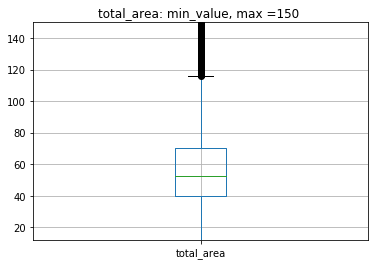

In [37]:
data.boxplot('total_area').set_title('total_area: min_value, max =150 ')
plt.ylim(min_value,150)
plt.show()

In [38]:
data['total_area'].describe()

count    21907.000000
mean        61.053580
std         36.447791
min         12.000000
25%         40.000000
50%         52.400000
75%         70.500000
max        900.000000
Name: total_area, dtype: float64

Итого по площади квартиры: в основном предлагают квартиры (+/-)50кв.м, но по гистограмме видно, что max предлагают квартиры где-то 45 кв.м. Есть единичные предложения до 900 кв.м, поэтому среднее 61кв.м > медианы 52кв.м.

Цена кв.метра:

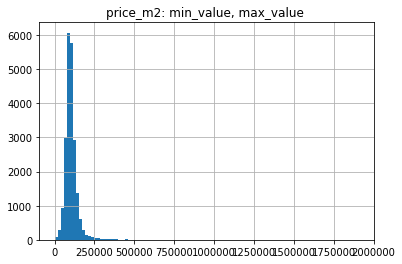

In [39]:
min_value = data['price_m2'].min()
max_value = data['price_m2'].max()
data['price_m2'].hist(bins=100, range=(min_value, max_value)).set_title('price_m2: min_value, max_value ')
plt.show() 

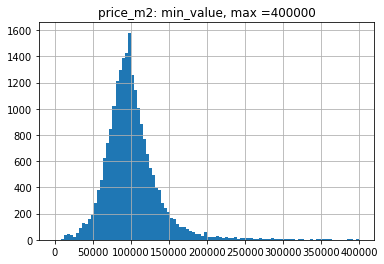

In [40]:
data['price_m2'].hist(bins=100, range=(min_value,400000)).set_title('price_m2: min_value, max =400000')
plt.show()

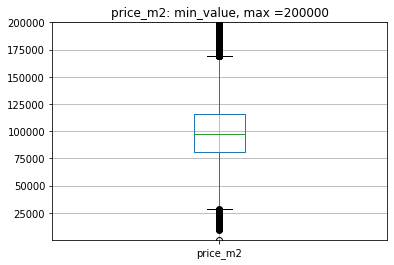

In [41]:
data.boxplot('price_m2').set_title('price_m2: min_value, max =200000')
plt.ylim(min_value,200000)
plt.show()

In [42]:
data['price_m2'].describe()

count    2.190700e+04
mean     1.033830e+05
std      4.948021e+04
min      1.118349e+02
25%      8.089625e+04
50%      9.717949e+04
75%      1.160881e+05
max      1.907500e+06
Name: price_m2, dtype: float64

Итого по стоимости квартиры: как видно по графикам реальная основная стоимость квартир по области варьируется от 80000 за кв.м до 120000 за кв.м., но это связано с тем, что большее количество объявлений подано в СПб. Есть отдельные выбросы как в min так и в max стороны. Это могут быть как ошибки заполнения, так и реальные предложения(от лесной избушки до дворца в центре города), надо просматривать эти случаи в совокупности с другими факторами.

Количество комнат:

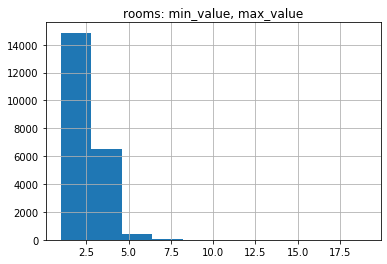

In [43]:
min_value = data['rooms'].min()
max_value = data['rooms'].max()
data['rooms'].hist(bins=10, range=(min_value, max_value)).set_title('rooms: min_value, max_value')
plt.show()

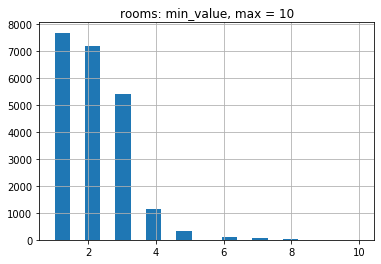

In [44]:
data['rooms'].hist(bins=20, range=(min_value, 10)).set_title('rooms: min_value, max = 10')
plt.show()

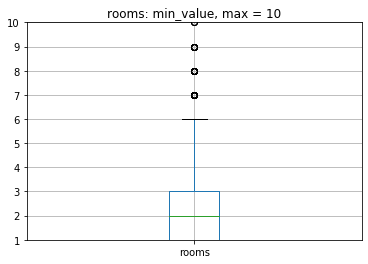

In [45]:
data.boxplot('rooms').set_title('rooms: min_value, max = 10')
plt.ylim(min_value,10)
plt.show()

In [46]:
data['rooms'].describe()

count    21907.000000
mean         2.086000
std          1.081073
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Итого по количеству комнат: В основном предлагаются квартиры до 3х комнат.Есть отдельные предложения до 19-ти комнат (наверное, дворец).

Высота потолка:

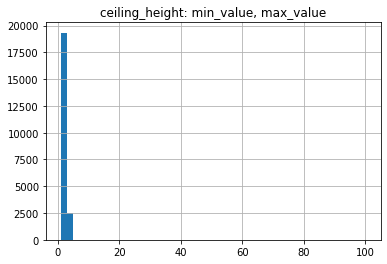

In [47]:
min_value = data['ceiling_height'].min()
max_value = data['ceiling_height'].max()
data['ceiling_height'].hist(bins=50, range=(min_value, max_value)).set_title('ceiling_height: min_value, max_value')
plt.show() 

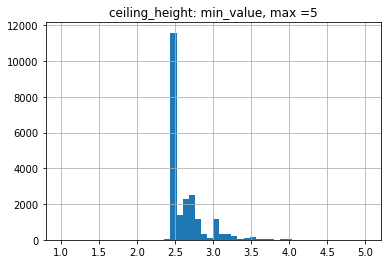

In [48]:
data['ceiling_height'].hist(bins=50, range=(min_value,5)).set_title('ceiling_height: min_value, max =5')
plt.show() 

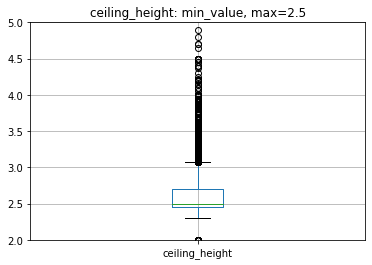

In [49]:
data.boxplot('ceiling_height').set_title('ceiling_height: min_value, max=2.5')
plt.ylim(2,5)
plt.show()

In [50]:
data['ceiling_height'].describe()

count    21907.000000
mean         2.650919
std          0.985337
min          1.000000
25%          2.450000
50%          2.500000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Итого по высоте потолка: по графикам видно, что медиана проходит по гос.стандарту для "хрущевок" - 2.5м. При этом, как я замечала ранее, есть явные ошибки. Хотя здравый смысл подсказывает, что минимум даже в садовом домике в ряд ли будет меньше 2м, а максимум в двухэтажной квартире(дворце) 5-6м.  

Время продажи квартиры:

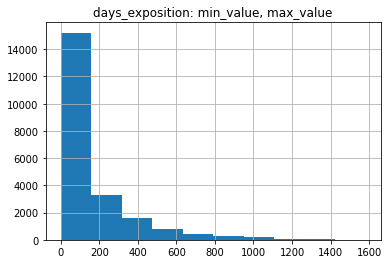

In [51]:
min_value = data['days_exposition'].min()
max_value = data['days_exposition'].max()
data['days_exposition'].hist(bins=10, range=(min_value, max_value)).set_title('days_exposition: min_value, max_value')
plt.show() 

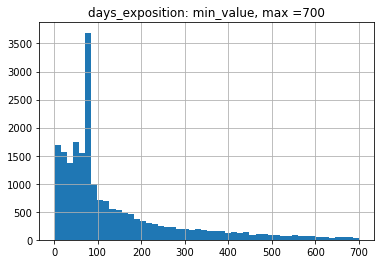

In [52]:
data['days_exposition'].hist(bins=50, range=(min_value, 700)).set_title('days_exposition: min_value, max =700')
plt.show()

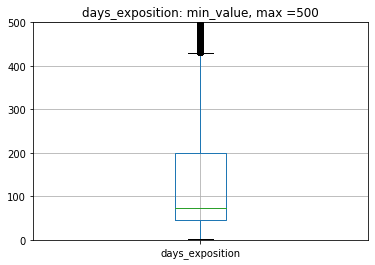

In [53]:
data.boxplot('days_exposition').set_title('days_exposition: min_value, max =500')
plt.ylim(0,500)
plt.show()

In [54]:
data['days_exposition'].describe()

count    21907.000000
mean       166.788332
std        209.248522
min          1.000000
25%         45.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

Итого по времени продажи: как видно по графикам от 1 дня до 4 лет. В среднем продажи проходят за 74 дня. Быстрыми продажами можно считать < 45 дней, а долгими - >199 дней.

Вопрос:Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

Зависимость и корреляция цены квартиры, цены кв.м от:

общей площади:

In [55]:
high_barb_total_area = data['total_area'].quantile(0.95) 
low_barb_total_area =  data['total_area'].quantile(0.01)

In [56]:
data_temp = data.query('@low_barb_total_area <= total_area <= @high_barb_total_area')

Text(0.5, 1.0, 'last_price=f(total_area)')

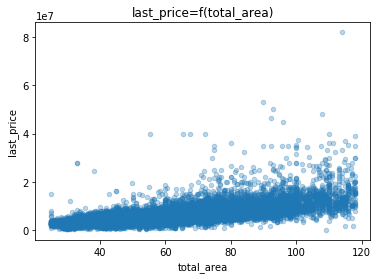

In [57]:
data_temp.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3).set_title('last_price=f(total_area)')

In [58]:
data_temp['last_price'].corr(data_temp['total_area'])


0.7012208363959401

Text(0.5, 1.0, 'price_m2=f(total_area)')

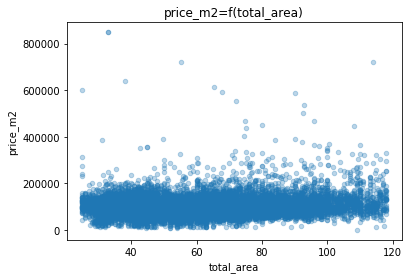

In [59]:
data_temp.plot(x='total_area', y='price_m2',kind='scatter', alpha=0.3 ).set_title('price_m2=f(total_area)')

In [60]:
data_temp['price_m2'].corr(data_temp['total_area'])

0.11958805571035866

количества комнат:

In [61]:
high_barb_rooms = data['rooms'].quantile(0.95) 
low_barb_rooms =  data['rooms'].quantile(0.01)

In [62]:
data_temp = data.query('@low_barb_rooms <= rooms <= @high_barb_rooms')

Text(0.5, 1.0, 'last_price=f(rooms)')

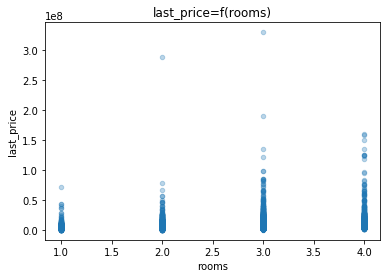

In [63]:
data_temp.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3).set_title('last_price=f(rooms)')

In [64]:
data_temp['last_price'].corr(data_temp['rooms'])

0.34304195162641515

Text(0.5, 1.0, 'price_m2=f(rooms)')

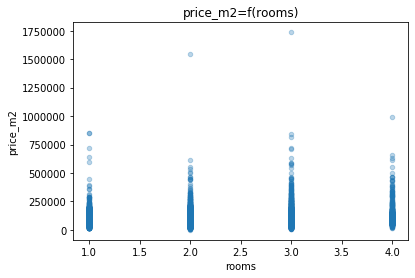

In [65]:
data_temp.plot(x='rooms', y='price_m2', kind='scatter', alpha=0.3).set_title('price_m2=f(rooms)')

In [66]:
data_temp['price_m2'].corr(data_temp['rooms'])

0.0005915170265417835

удаленности от центра:

Text(0.5, 1.0, 'last_price = f(cityCenters_nearest)')

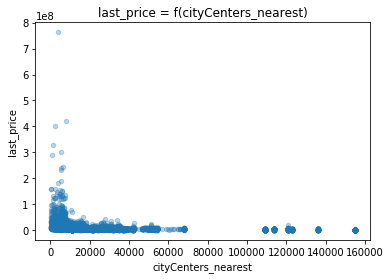

In [67]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3).set_title('last_price = f(cityCenters_nearest)')

In [68]:
data['last_price'].corr(data['cityCenters_nearest'])

-0.16315147691294807

Text(0.5, 1.0, 'price_m2 = f(cityCenters_nearest)')

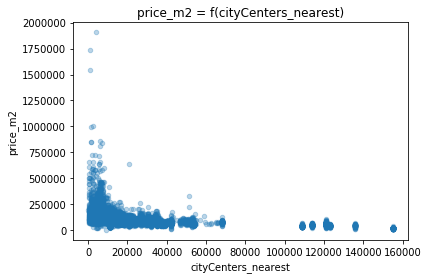

In [69]:
data.plot(x='cityCenters_nearest', y='price_m2', kind='scatter', alpha=0.3).set_title('price_m2 = f(cityCenters_nearest)')

In [70]:
data['price_m2'].corr(data['cityCenters_nearest'])

-0.35932204447790234

зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом

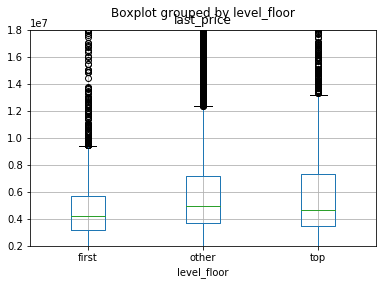

In [71]:
import warnings
warnings.filterwarnings('ignore')
data.boxplot(column = 'last_price',by='level_floor')
plt.ylim(2000000,18000000)
plt.show()

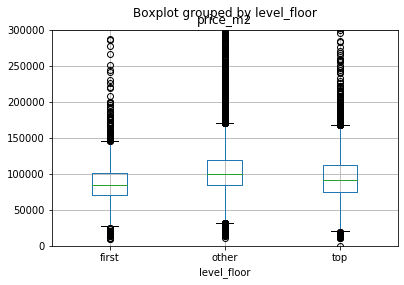

In [72]:
data.boxplot(column = 'price_m2',by='level_floor')
plt.ylim(0,300000)
plt.show()

Также изучите зависимость от даты размещения: дня недели, месяца и года.

Text(0.5, 1.0, 'last_price = f(day_of_week)')

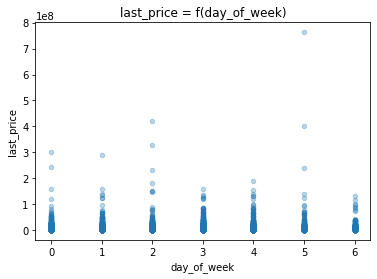

In [73]:
data.plot(x='day_of_week', y='last_price', kind='scatter', alpha=0.3).set_title('last_price = f(day_of_week)')

In [74]:
data['last_price'].corr(data_temp['day_of_week'])

-0.004426299154159162

Text(0.5, 1.0, 'last_price = f(month)')

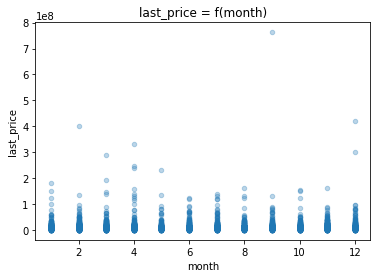

In [75]:
data.plot(x='month', y='last_price', kind='scatter', alpha=0.3).set_title('last_price = f(month)')

In [76]:
data['last_price'].corr(data_temp['month'])

-0.0036733468994516335

Text(0.5, 1.0, 'last_price = f(year)')

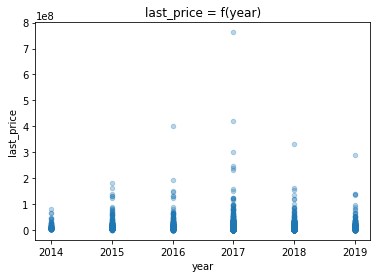

In [77]:
data.plot(x='year', y='last_price', kind='scatter', alpha=0.3).set_title('last_price = f(year)')

In [78]:
data['last_price'].corr(data_temp['year'])

-0.04109840489158057

Итого по зависимости цены от разных факторов: Во-первых, некорректно сравнивать цены из разных "весовых" категорий. Правильнее сравнивать стоимость кв.м. Вычисленная корреляция показывает, что общая цена  зависит  от площади, количества комнат, этажа, уменьшается при расстоянии от центра. А стоимость кв.м мало зависит от площади (а на самом деле незначительно снижается с ростом площади ( и  от количества комнат) . Причина в том, что взят массив по области, где большой разброс цен, без учета других факторов. По корреляции цен и календарных факторов видно, что зависимости здесь нет.        

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [79]:
high_barb_price_m2 = data['price_m2'].quantile(0.95) 
low_barb_price_m2 =  data['price_m2'].quantile(0.01)

data_better = data.query('@low_barb_price_m2 <= price_m2 <= @high_barb_price_m2')
data_better

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,days_exposition,locality_type,price_m2,day_of_week,month,year,level_floor,living_total,kitchen_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,74,0,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.45,11,18.60,1,False,...,10000.0,81,4,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.45,5,34.30,4,False,...,90.0,558,0,92785.714286,3,8,2015,other,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,121,0,100000.000000,1,6,2018,other,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,2.45,12,14.40,5,False,...,10000.0,55,1,95065.789474,0,9,2018,other,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,10000.0,519,0,129903.978052,3,10,2016,other,0.552812,0.145405
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.00,8,False,...,352.0,239,0,73717.948718,4,8,2016,other,0.641026,0.128205
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.0,74,0,72490.845228,1,3,2017,other,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,2.45,5,38.00,4,False,...,10000.0,45,0,52542.372881,0,1,2018,other,0.644068,0.144068


In [80]:

top10 = data_better['locality_name'].value_counts().head(10)
data10 = data_better.query('locality_name in @top10.index')  
data10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,days_exposition,locality_type,price_m2,day_of_week,month,year,level_floor,living_total,kitchen_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,74,0,120370.370370,3,3,2019,other,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,2.45,11,18.60,1,False,...,10000.0,81,4,82920.792079,1,12,2018,first,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,2.45,5,34.30,4,False,...,90.0,558,0,92785.714286,3,8,2015,other,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,121,0,100000.000000,1,6,2018,other,0.320000,0.410000
6,6,3700000.0,37.30,2017-11-02,1,2.45,26,10.60,6,False,...,10000.0,155,4,99195.710456,3,11,2017,other,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.30,4,False,...,353.0,29,0,100566.572238,2,2,2018,other,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19,2,2.45,5,31.00,2,False,...,300.0,15,0,105769.230769,3,7,2018,other,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.30,7,False,...,10000.0,519,0,129903.978052,3,10,2016,other,0.552812,0.145405
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5,73.30,3,False,...,796.0,74,0,72490.845228,1,3,2017,other,0.547792,0.103356


In [81]:
report = data10.pivot_table(index=['locality_name'],values = ['price_m2'], aggfunc =['min','median','max'])
report.columns=['min','mean','max']
report.sort_values(by='mean',ascending = False)

,min,mean,max
locality_name,,,
Санкт-Петербург,35384.615385,102571.061329,163061.224490
Пушкин,59836.065574,99678.547259,160000.000000
Кудрово,54160.346696,95675.473579,160401.002506
Парголово,39205.955335,91642.857143,138522.427441
Мурино,50000.000000,86175.643522,138580.246914
Шушары,47700.416089,76747.967480,147826.086957
Колпино,47957.371226,74722.222222,125000.000000
Гатчина,38696.537678,67927.170868,146315.789474
Всеволожск,36486.486486,65789.473684,136423.841060


Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

In [82]:
data_better['distance_km'] = data_better['cityCenters_nearest']//1000
data_spb = data_better.query('locality_name == "Санкт-Петербург"')

Сначала посмотрим  общую картину по области, зависимость стоимости кв.м от расстояния

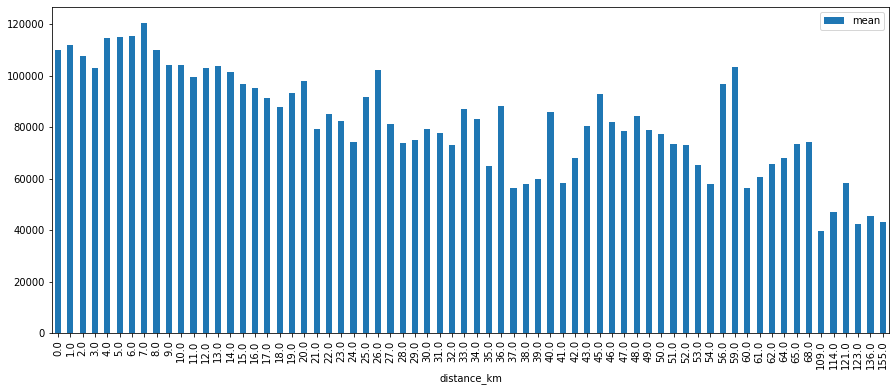

In [83]:
report = data_better.pivot_table(index=['distance_km'],values = ['price_m2'],aggfunc='median')
report.columns=['mean']
report.plot( y='mean', kind='bar',figsize =(15,6))
plt.show()

Хотя среднее считали по медиане, график не выглядит плавным. Это можно объяснить, как выбросами, так и тем, что населенные пункты расположены дискретно, на том километре, где находится город - всплеск стоимости. Теперь то же самое посмотрим по Санкт-Петербургу, предполагая, что там непрерывная жилая зона.

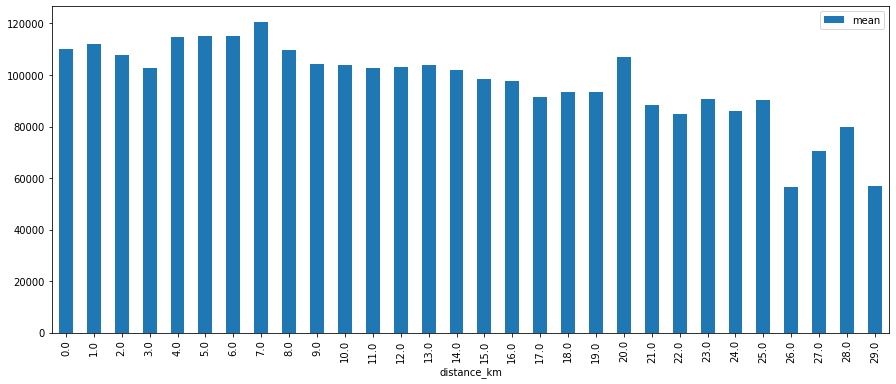

In [84]:
report = data_spb.pivot_table(index=['distance_km'],values = ['price_m2'],aggfunc='median')
report.columns=['mean']
report.plot( y='mean', kind='bar',figsize =(15,6))
plt.show()

Как видно из этого графика, зона СПб простирается до 29-ти км. И, естественно, повторяет до 29 километра общий график. Эта картина никак не вяжется с житейскими представлениями. Чтобы убедиться, так это или не так, построим другие детальные графики. 

Text(0.5, 1.0, 'price_m2, bins= 100')

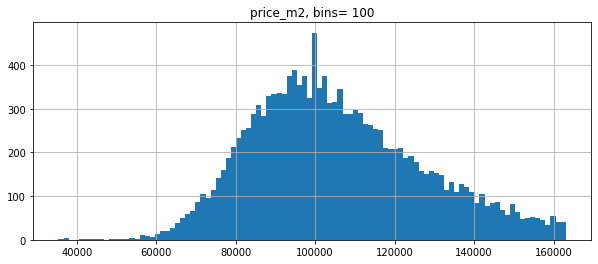

In [85]:
data_spb['price_m2'].hist(bins=100,figsize=(10,4)).set_title('price_m2, bins= 100')

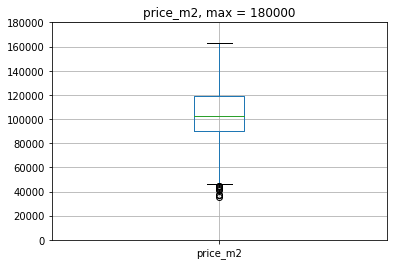

In [86]:
data_spb.boxplot('price_m2').set_title('price_m2, max = 180000')
plt.ylim(0,180000)
plt.show()

Методом тыка удалось подобрать масштаб, чтобы определить, где кончаются усы и начинаются выбросы. Графическое представление согласуется с числовым в describe().

In [87]:
data_spb['price_m2'].describe()

count     14572.000000
mean     105554.853602
std       21355.856513
min       35384.615385
25%       90000.000000
50%      102571.061329
75%      119230.769231
max      163061.224490
Name: price_m2, dtype: float64

Отфильтруем выбросы.

In [88]:
high_barb = data_spb['price_m2'].quantile(0.95)
low_barb = data_spb['price_m2'].quantile(0.01) 


In [89]:
data_spb_filter = data_spb.query('@low_barb < price_m2 < @high_barb')
data_spb_filter

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_type,price_m2,day_of_week,month,year,level_floor,living_total,kitchen_total,distance_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,74,0,120370.370370,3,3,2019,other,0.472222,0.231481,16.0
2,10,5196000.0,56.00,2015-08-20,2,2.45,5,34.3,4,False,...,558,0,92785.714286,3,8,2015,other,0.612500,0.148214,13.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,121,0,100000.000000,1,6,2018,other,0.320000,0.410000,8.0
7,5,7915000.0,71.60,2019-04-18,2,2.45,24,52.7,22,False,...,74,0,110544.692737,3,4,2019,other,0.736034,0.263966,11.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,False,...,289,0,88524.590164,6,2,2017,other,0.714754,0.106557,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000.0,101.00,2019-04-01,3,3.05,15,63.0,12,False,...,23,0,91089.108911,0,4,2019,other,0.623762,0.148515,14.0
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,False,...,29,0,100566.572238,2,2,2018,other,0.461756,0.257790,16.0
23690,3,5500000.0,52.00,2018-07-19,2,2.45,5,31.0,2,False,...,15,0,105769.230769,3,7,2018,other,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,519,0,129903.978052,3,10,2016,other,0.552812,0.145405,4.0


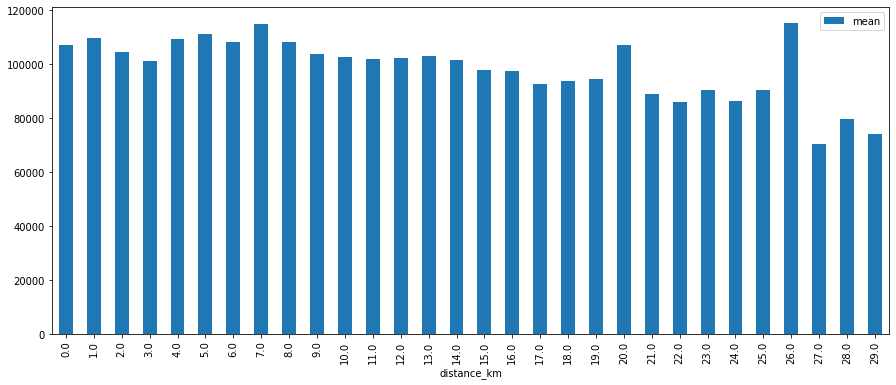

In [90]:
report = data_spb_filter.pivot_table(index=['distance_km'],values = ['price_m2'],aggfunc='median')
report.columns=['mean']
report.plot( y='mean', kind='bar',figsize =(15,6))
plt.show()

График стал "ровнее", но до 4-х километров как бы аномальная зона. Могу предположить,  что в самом центре больше концентрация музеев и гостиниц, чем вообще по городу,  а так же река, поэтому меньше жилых домов и, соответственно, объявлений о продаже. Посчитаем количество объявлений на каждый километр.

In [91]:

data_spb_filter.query('distance_km < 4')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_type,price_m2,day_of_week,month,year,level_floor,living_total,kitchen_total,distance_km
24,8,6500000.0,97.2,2015-10-31,2,2.45,3,46.5,1,False,...,265,0,66872.427984,5,10,2015,first,0.478395,0.201646,2.0
35,6,15500000.0,149.0,2017-06-26,5,2.45,5,104.0,4,False,...,644,0,104026.845638,0,6,2017,other,0.697987,0.114094,3.0
99,32,9600000.0,90.0,2017-09-26,4,2.45,5,67.0,2,False,...,104,0,106666.666667,1,9,2017,other,0.744444,0.088889,2.0
136,16,6500000.0,51.8,2018-08-01,2,3.45,6,25.6,2,False,...,163,0,125482.625483,2,8,2018,other,0.494208,0.140927,3.0
138,8,4800000.0,40.0,2017-11-18,2,2.45,3,29.0,2,False,...,80,0,120000.000000,5,11,2017,other,0.725000,0.150000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23449,4,6300000.0,52.6,2015-05-28,3,3.25,5,29.8,2,False,...,505,0,119771.863118,3,5,2015,other,0.566540,0.165399,3.0
23521,13,8500000.0,65.0,2018-11-01,2,2.45,4,44.0,2,False,...,74,0,130769.230769,3,11,2018,other,0.676923,0.235385,3.0
23555,5,15350000.0,158.5,2019-03-07,7,2.95,7,57.4,7,False,...,74,0,96845.425868,3,3,2019,top,0.362145,0.078233,3.0
23602,0,8700000.0,73.0,2019-01-23,3,2.65,4,68.0,4,False,...,34,0,119178.082192,2,1,2019,top,0.931507,0.068493,2.0


In [92]:
data_spb_filter['distance_km'].value_counts().sort_index()

0.0       46
1.0      155
2.0      230
3.0      411
4.0      600
5.0      505
6.0      282
7.0      298
8.0      562
9.0      633
10.0     817
11.0    1333
12.0    1403
13.0    1326
14.0    1446
15.0    1308
16.0    1067
17.0     500
18.0     163
19.0      78
20.0      82
21.0     187
22.0     128
23.0      30
24.0      20
25.0      73
26.0       1
27.0       1
28.0      10
29.0       1
Name: distance_km, dtype: int64

Действительно, до 4х км их меньше, а когда мало данных - больше погрешность. На графике после 8-ого км идет резкое уменьшение цены кв.м, значит можно считать, что центральная часть - до 8 км.

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [93]:
data_spb_filter['city'] = 'town'
data_spb_filter.loc[data_spb_filter['distance_km'] < 9, 'city'] = 'сentre'



Сверим параметры по центру и по всему городу:
Площадь квартиры:

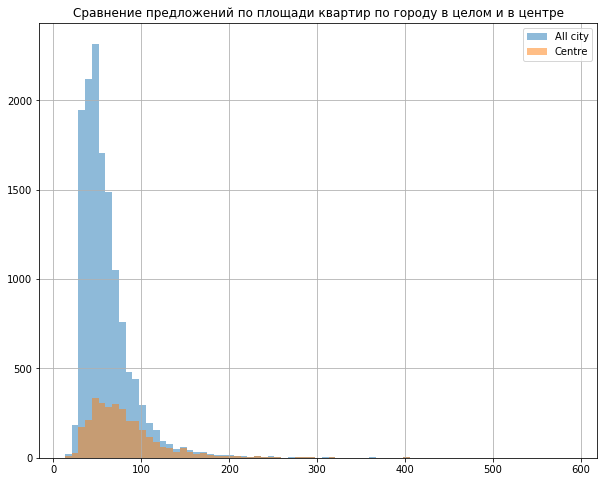

In [94]:
data_spb_filter['total_area'].hist(alpha =0.5,label = 'All city',bins=75,figsize =(10,8))
data_spb_filter.query('city == "сentre"')['total_area'].hist(alpha =0.5,label = 'Centre',bins=75,figsize =(10,8)).set_title('Сравнение предложений по площади квартир по городу в целом и в центре')

plt.legend();

In [95]:
data_spb_filter['total_area'].describe()

count    13696.000000
mean        60.403860
std         32.296073
min         13.000000
25%         41.000000
50%         52.920000
75%         70.000000
max        590.000000
Name: total_area, dtype: float64

In [96]:
data_spb_filter.query('city == "сentre"')['total_area'].describe()

count    3089.000000
mean       81.769848
std        46.568830
min        13.000000
25%        52.000000
50%        72.000000
75%        97.000000
max       590.000000
Name: total_area, dtype: float64

цена кв.м:

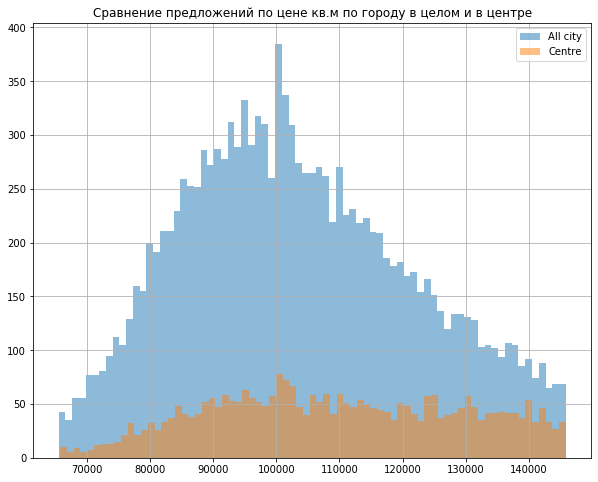

In [97]:
data_spb_filter['price_m2'].hist(alpha =0.5,label = 'All city',bins=75,figsize =(10,8))
data_spb_filter.query('city == "сentre"')['price_m2'].hist(alpha =0.5,label = 'Centre',bins=75,figsize =(10,8)).set_title('Сравнение предложений по цене кв.м по городу в целом и в центре')


plt.legend();

In [98]:
data_spb_filter['price_m2'].describe()

count     13696.000000
mean     103495.926522
std       18292.419731
min       65526.315789
25%       89655.172414
50%      101639.344262
75%      116302.186879
max      145833.333333
Name: price_m2, dtype: float64

In [99]:
data_spb_filter.query('city == "сentre"')['price_m2'].describe()

count      3089.000000
mean     109445.489329
std       19650.176259
min       65789.473684
25%       93913.043478
50%      108333.333333
75%      125650.000000
max      145833.333333
Name: price_m2, dtype: float64

количество комнат:

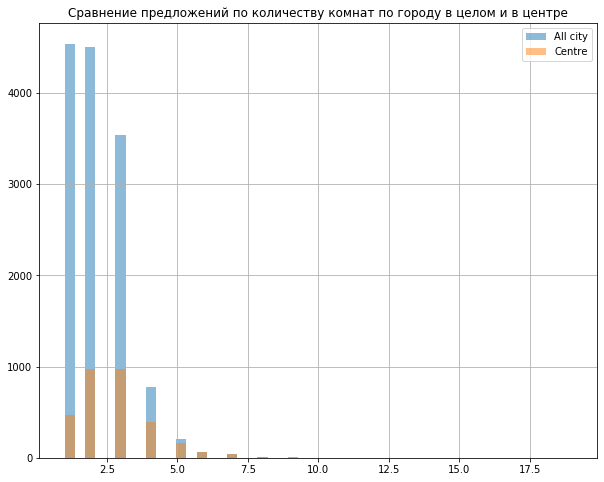

In [100]:
data_spb_filter['rooms'].hist(alpha =0.5,label = 'All city',bins=50,figsize =(10,8))
data_spb_filter.query('city == "сentre"')['rooms'].hist(alpha =0.5,label = 'Centre',bins=50,figsize =(10,8)).set_title('Сравнение предложений по количеству комнат по городу в целом и в центре')

plt.legend();

In [101]:
data_spb_filter['rooms'].describe()

count    13696.000000
mean         2.132812
std          1.101342
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [102]:
data_spb_filter.query('city == "сentre"')['rooms'].describe()

count    3089.000000
mean        2.757527
std         1.400799
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

высота потолков:

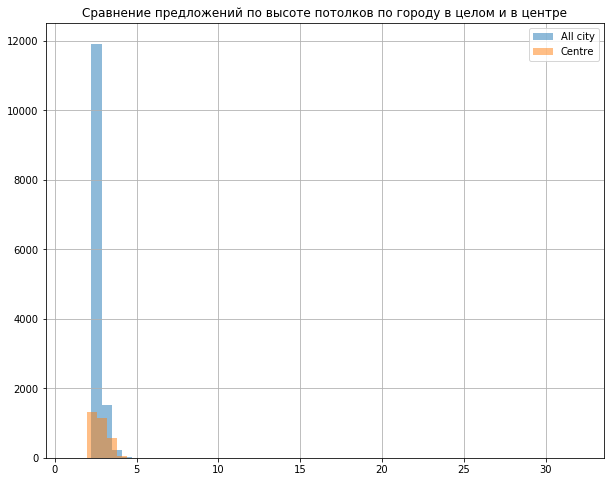

In [103]:
data_spb_filter['ceiling_height'].hist(alpha =0.5,label = 'All city',bins=50,figsize =(10,8))
data_spb_filter.query('city == "сentre"')['ceiling_height'].hist(alpha =0.5,label = 'Centre',bins=50,figsize =(10,8)).set_title('Сравнение предложений по высоте потолков по городу в целом и в центре')

plt.legend();

In [104]:
data_spb_filter['ceiling_height'].describe()

count    13696.000000
mean         2.648383
std          0.714903
min          1.000000
25%          2.450000
50%          2.500000
75%          2.700000
max         32.000000
Name: ceiling_height, dtype: float64

In [105]:
data_spb_filter.query('city == "сentre"')['ceiling_height'].describe()

count    3089.000000
mean        2.842004
std         0.856704
min         2.000000
25%         2.450000
50%         2.750000
75%         3.100000
max        32.000000
Name: ceiling_height, dtype: float64

Из сравнения гистаграмм можно сделать вывод, что структура предложений по городу в целом и центру слегка отличаются.По городу больше продают квартиры небольшой площади(до 50 кв.м), чем в центре, но и там, и там их больше всего в предложениях. Стоимость кв.м в центре выше в среднем на 10000 руб. но при этом в центре почти одинаковое предложение в разных ценовых категориях, в отличие от всего по городу.
По числу комнат: всего по городу предлагают больше 1-2-комн.квартиры, а в центре - 2-3-комнатные, причем в центре больше квартир в высокими потолками. 


 Сверим факторы, влияющие на стоимость квартиры для города в целом и отдельно центра:
 

от общей площади:

<function matplotlib.pyplot.legend(*args, **kwargs)>

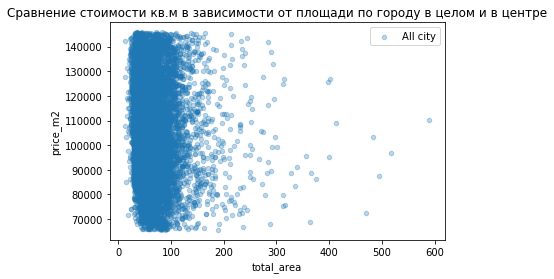

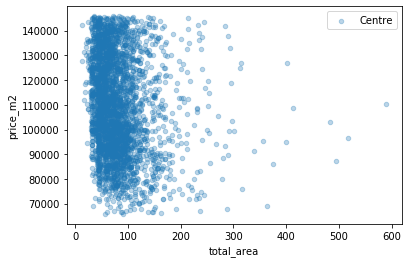

In [106]:
data_spb_filter.plot(x='total_area', y='price_m2', kind='scatter', alpha=0.3,label = 'All city').set_title('Сравнение стоимости кв.м в зависимости от площади по городу в целом и в центре')
data_spb_filter.query('city == "сentre"').plot(x='total_area', y='price_m2', kind='scatter', alpha=0.3,label = 'Centre')
plt.legend 

In [107]:
data_spb_filter['price_m2'].corr(data_spb_filter['total_area'])

-0.04022332002581571

In [108]:
data_spb_filter.query('city == "сentre"')['price_m2'].corr(data_spb_filter.query('city == "сentre"')['total_area'])

-0.16179251139030268

от числа комнат:

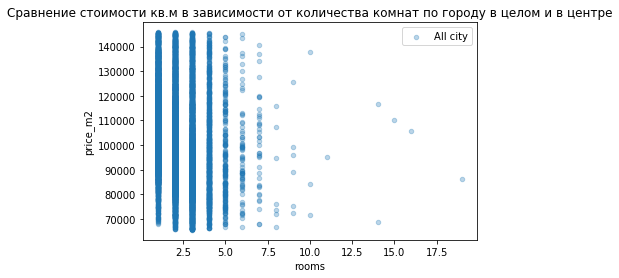

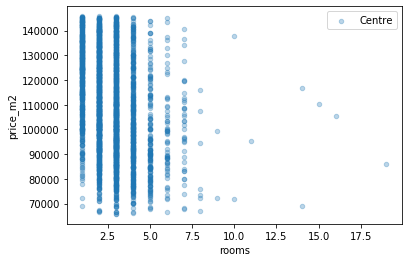

In [109]:
data_spb_filter.plot(x='rooms', y='price_m2', kind='scatter', alpha=0.3,label = 'All city').set_title('Сравнение стоимости кв.м в зависимости от количества комнат по городу в целом и в центре')
data_spb_filter.query('city == "сentre"').plot(x='rooms', y='price_m2', kind='scatter', alpha=0.3,label = 'Centre')
plt.legend();

In [110]:
data_spb_filter['price_m2'].corr(data_spb_filter['rooms'])

-0.2392400886886562

In [111]:
data_spb_filter.query('city == "сentre"')['price_m2'].corr(data_spb_filter.query('city == "сentre"')['rooms'])

-0.2914159075738063

от расстония до центра:

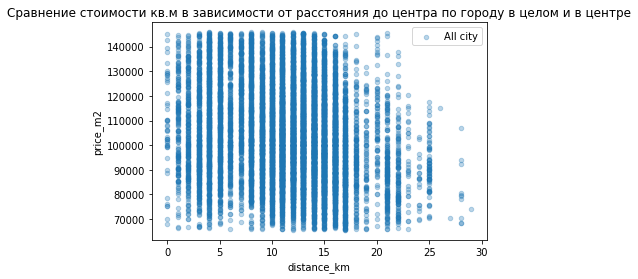

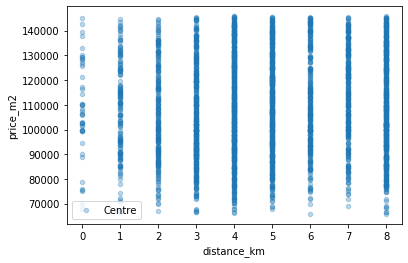

In [112]:
data_spb_filter.plot(x='distance_km', y='price_m2', kind='scatter', alpha=0.3,label = 'All city').set_title('Сравнение стоимости кв.м в зависимости от расстояния до центра по городу в целом и в центре')
data_spb_filter.query('city == "сentre"').plot(x='distance_km', y='price_m2', kind='scatter', alpha=0.3,label = 'Centre')
plt.legend();

In [113]:
data_spb_filter['price_m2'].corr(data_spb_filter['distance_km'])

-0.21702008793653982

In [114]:
data_spb_filter.query('city == "сentre"')['price_m2'].corr(data_spb_filter.query('city == "сentre"')['distance_km'])

0.07358766420606941

от категории этажа:

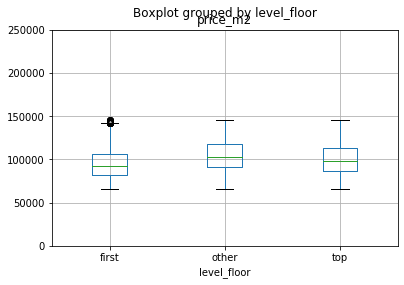

In [115]:
data_spb_filter.boxplot(column = 'price_m2',by='level_floor')
plt.ylim(0,250000)
plt.show()

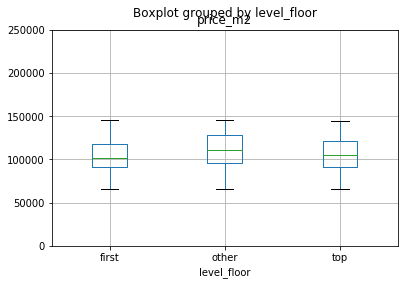

In [116]:
data_spb_filter.query('city == "сentre"').boxplot(column = 'price_m2',by='level_floor')
plt.ylim(0,250000)
plt.show()

от даты подачи объявления:

In [117]:
#data_spb_filter['date_int' ] =data_spb_filter['first_day_exposition'].astype(int)
#data_spb_filter.plot(x='date_int', y='price_m2', kind='scatter', alpha=0.3,label = 'All city').set_title('Сравнение стоимости кв.м в зависимости от даты подачи заявления по городу в целом и в центре')
#data_spb_filter.query('city == "сentre"').plot(x='date_int', y='price_m2', kind='scatter', alpha=0.3,label = 'Centre')
#plt.legend();

In [118]:
#data_spb_filter['price_m2'].corr(data_spb_filter['date_int'])


In [119]:
#data_spb_filter.query('city == "сentre"')['price_m2'].corr(data_spb_filter.query('city == "сentre"')['date_int'])

от высоты потолка:

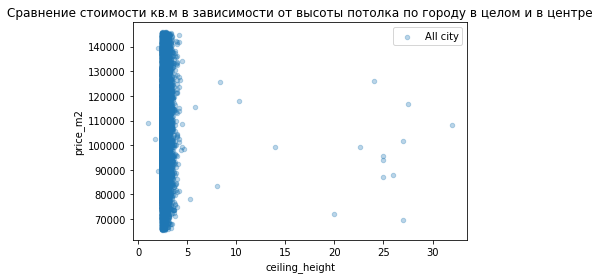

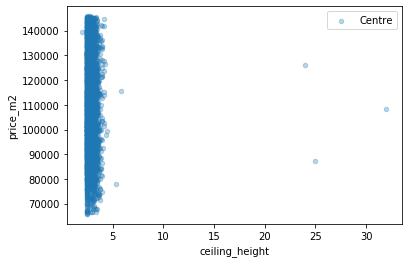

In [120]:
data_spb_filter.plot(x='ceiling_height', y='price_m2', kind='scatter', alpha=0.3,label = 'All city').set_title('Сравнение стоимости кв.м в зависимости от высоты потолка по городу в целом и в центре')
data_spb_filter.query('city == "сentre"').plot(x='ceiling_height', y='price_m2', kind='scatter', alpha=0.3,label = 'Centre')
plt.legend();

In [121]:
data_spb_filter['price_m2'].corr(data_spb_filter['ceiling_height'])

0.04068257317821073

In [122]:
data_spb_filter.query('city == "сentre"')['price_m2'].corr(data_spb_filter.query('city == "сentre"')['ceiling_height'])

-0.02557110932188761

При сравнении графиков зависимости стоимости квартир от различных факторов можно сделать следующие выводы. Диаграммы рассеивания  зависимости цены кв.м от общей площади практически одинаковы. Корреляция зависимости почти 0, но в центре за счет более однородной выборки корреляция со знаком минус, что подтверждаетя практикой, что чем больше площадь,тем меньше стоимость метра. То же самое наблюдается при зависимости от числа комнат, корреляция небольшая, но более выражена в центре, по сравнению со всего по городу.

Зависимость от расстояния до центра корреляция почти 0.07 в центре, а всего по городу -0.22,и это меньше, чем -0.36 по области. Зависмость цены от этажа везде идентична, дешевле всего первый этаж.
Очень небольшая зависимость цены от высоты потолка наблюдается всего по городу, а в центре при этом - почти 0.

## Общий вывод

- В процессе работы с файлом с целью выявления параметров, влияющих на формирование цены квартиры, сначала был подчищен сам файл на предмет удаления или, если это было возможно, коррекции неполностью заполненых строк(записей). 
- Для 10-ти населенных пунктов с наибольшим количеством поданных объявлений были посчитаны значения средней(по медиане) стоимости кв.м, а также min и мах стоимости.
- Затем произведен анализ основных параметров по области в целом, по СПб и отдельно по центру.
- Получены результаты:
- стоимость кв.м наибольшая в центре:средняя 108000руб/кв.м и 102000руб/кв.м по городу.
- расстояние до центра - параметр, имеющий наибольшее влияние на цену кв.м. Max влияние по области (корр. -0.36, всего по городу -0.22 и min в центре 0.07)
- общая площадь квартиры: зависимость не прямопропорциональная, незначительное снижение при увеличении площади(аналогично, числа комнат) при прочих равных параметрах. Тендеция наиболее выражена в центре, потому что там более однородная выборка.
- уровень этажа: независимо от зоны цена ниже на первом и последнем этажах.
- высота потолка: имеет небольшое значение по выборке по всему городу, но для центра зависимость от высоты потолка равна 0.
- Зависимости от даты подачи заявления не выявлено.
-    Общий вывод: ряд параметров очень значимых при определении цены для области и города в целом нивелируется при определении цены в центре. Главное значение имеет магическое слово "центр".
